In [10]:
import pandas as pd
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

## Generar geografico de secciones de TTGL

In [11]:
# secciones_ARG = gpd.read_file('./mapaelectoral/geojson_CNE/secciones.geojson')
# secciones_ARG['gid'] = secciones_ARG['gid'].astype(str).str[2:]

# ## Corregir nombres de provincia para igualar IGN
# secciones_ARG['provincia'] = secciones_ARG['provincia'].str.replace('Tierra del Fuego, Antártida e Islas del Atlántico', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur')
# secciones_ARG['provincia'] = secciones_ARG['provincia'].str.replace('Neuquen', 'Neuquén')

# provs_CNE_ARG = secciones_ARG.dissolve('provincia')[['geometry']].reset_index()

# # secciones_ARG.loc[secciones_ARG.departamen == 'Vicente Lopez']
# secciones_ARG[['gid', 'provincia', 'departamen', 'geometry']].head()

In [37]:
secciones_ARG = pd.read_csv('./info/secciones_departamentos-TTGL.csv', dtype = 'str')
dptos_IN1_from_radios = gpd.read_file('./info/dptos_fromIGNradios.geojson')


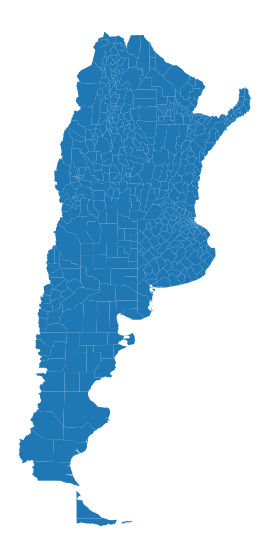

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (7, 10))
dptos_IN1_from_radios.plot(ax = ax)

plt.axis('off')
plt.show()

## Archivos geojson de IGN

In [12]:
provs_url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/provincia/json'
dptos_url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/departamento/json'

provs_IGN = gpd.read_file(provs_url)
dptos_IGN = gpd.read_file(dptos_url)


In [60]:
dptos_IGN.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."


In [13]:
# ## Agregar codigo IGN a info de CNE
# provs_CNE_ARG = provs_CNE_ARG.merge(provs_IGN[['nam', 'in1']], left_on = 'provincia', right_on = 'nam').drop('nam', axis = 1)

In [24]:
# dptos_IGN.loc[dptos_IGN.gna == 'Comuna'].sort_values('in1')

In [28]:
# secciones_ARG.dtypes

# secciones_ARG

# dptos_IGN.merge(secciones_ARG, left_on = 'in1', right_on = 'IN1', how = 'outer')

## Spatial Join

In [56]:
inters = gpd.overlay(dptos_IGN[['nam', 'in1', 'geometry']], dptos_IN1_from_radios, how='intersection') # Demora un poco
inters['area'] = inters.area

inter_a = inters.groupby(['nam', 'in1']).apply(lambda x: x.nlargest(1, 'area')).reset_index(drop = True)
# inter_b = inters.groupby(['IN1']).apply(lambda x: x.nlargest(1, 'area')).reset_index(drop = True)


In [48]:
inter_a.nunique()
# inter_b.nunique()

nam         445
in1         527
IN1         525
geometry    527
area        527
dtype: int64

In [53]:
## Lezama - Chascomus y Rio-Grande - Tolhuin
# inter_a.groupby('IN1').size().loc[inter_a.groupby('IN1').size() != 1]

# IN1
# 06217
# 94007

IN1
06217    2
94007    2
dtype: int64

In [55]:
inter_a.loc[inter_a.IN1.isin(['06217', '94007'])]

,nam,in1,IN1,geometry,area
101,Chascomús,06218,06217,"POLYGON ((-57.79617 -35.44492, -57.79633 -35.4...",0.314180
287,Lezama,06466,06217,"POLYGON ((-57.48964 -35.81152, -57.49059 -35.8...",0.104489
405,Río Grande,94008,94007,"POLYGON ((-68.56935 -52.70694, -68.56996 -52.7...",0.893861
489,Tolhuin,94011,94007,"POLYGON ((-68.36912 -54.55150, -68.36831 -54.4...",0.697862


In [ ]:
### Lugares con codigo diferente (in1, de radios IGN, vs. IN1 de dptos IGN)
## Son las comunas de CABA, ademas de Lezama-Chasco y Tierra del Fuego

In [59]:
inter_a.loc[inter_a.in1 != inter_a.IN1].sort_values('in1')

,nam,in1,IN1,geometry,area
116,Comuna 1,02007,0214007,"POLYGON ((-58.38609 -34.57823, -58.38592 -34.5...",0.001757
123,Comuna 2,02014,0214014,"POLYGON ((-58.37387 -34.57871, -58.37389 -34.5...",0.000621
124,Comuna 3,02021,0214021,"POLYGON ((-58.39290 -34.59966, -58.39273 -34.6...",0.000628
125,Comuna 4,02028,0214028,"POLYGON ((-58.35517 -34.61945, -58.35511 -34.6...",0.002220
126,Comuna 5,02035,0214035,"POLYGON ((-58.41597 -34.59787, -58.41566 -34.5...",0.000655
127,Comuna 6,02042,0214042,"POLYGON ((-58.42672 -34.62702, -58.42705 -34.6...",0.000673
128,Comuna 7,02049,0214049,"POLYGON ((-58.42672 -34.62702, -58.42647 -34.6...",0.001221
129,Comuna 8,02056,0214056,"POLYGON ((-58.44910 -34.65118, -58.44879 -34.6...",0.002211
130,Comuna 9,02063,0214063,"POLYGON ((-58.51922 -34.63303, -58.51904 -34.6...",0.001632
117,Comuna 10,02070,0214070,"POLYGON ((-58.47777 -34.62240, -58.47738 -34.6...",0.001243


In [31]:
# import warnings
# warnings.filterwarnings('ignore')

# inters_result = []

# for i, row in provs_CNE_ARG.iloc[1:3].iterrows():
#     print(row['provincia'])
#     dptos_IGN_prov = dptos_IGN.loc[~dptos_IGN.nam.str.contains('Antártida')].loc[dptos_IGN.in1.str[:2] == row['in1']]
#     secciones_ARG_prov = secciones_ARG.loc[~secciones_ARG.departamen.str.contains('Antartida')].loc[secciones_ARG.provincia == row['provincia']]

#     inters = gpd.overlay(dptos_IGN_prov[['nam', 'in1', 'geometry']], secciones_ARG_prov[['gid', 'provincia', 'departamen', 'geometry']], how='intersection') # Demora un poco
#     inters['area'] = inters.area

#     inter_prov = inters.groupby(['provincia', 'gid']).apply(lambda x: x.nlargest(1, 'area')).reset_index(drop = True)

#     inters_result += [inter_prov]
        
# secciones_CNE_IGN = pd.concat(inters_result)
# secciones_CNE_IGN = gpd.GeoDataFrame(secciones_CNE_IGN)

Catamarca


KeyError: 'in1'

## Guardar resultados

In [6]:

secciones_CNE_IGN[['in1', 'gid', 'provincia', 'departamen', 'nam', 'geometry']].to_file('./mapaelectoral/secciones_IGN.geojson', driver = 'GeoJSON')
secciones_CNE_IGN[['in1', 'gid', 'provincia', 'departamen', 'nam']].to_csv('./info/CNE_IGN_spatialjoin.csv', index = False)
